# Download MNIST Dataset (Pytorch)

## import libraries

In [7]:
import os
import boto3
import logging
import pickle

from pathlib import Path

import matplotlib.pyplot as plt

from torchvision import datasets
from torchvision.transforms import ToTensor

In [8]:
# set up logging
DEBUG_LEVEL = bool(int(os.getenv("DEBUG_LEVEL", 0)))

if DEBUG_LEVEL:
    logging.basicConfig(level=logging.DEBUG)
else:
    logging.basicConfig(level=logging.INFO)

_LOGGER = logging.getLogger(__name__)


def _is_file_downloaded(file_downloaded_path: Path) -> bool:
    """Check if file is already downloaded."""
    if os.path.exists(file_downloaded_path):
        _LOGGER.info("{} already exists, skipping ...".format(file_downloaded_path))
        return True

    return False

## download data

In [19]:
use_ceph = bool(int(os.getenv("USE_CEPH", 0)))
project_name = os.environ.get("PROJECT_NAME", "elyra-aidevsecops-tutorial")

# Prepare MNIST data.
train_data = datasets.MNIST(
    root="../../data/raw/pytorch-mnist-dataset",
    train=True,
    transform=ToTensor(),
    download=True,
)
test_data = datasets.MNIST(
    root="../../data/raw/pytorch-mnist-dataset",
    train=False,
    transform=ToTensor(),
    download=True,
)

# Set path where to store
directory_path = Path.cwd().parents[0]
destination_path = directory_path.joinpath(
    str(os.environ.get("DATASET", "../data/raw/pytorch-mnist-dataset/MNIST/raw"))
)

if use_ceph:

    s3_endpoint_url = os.environ["OBJECT_STORAGE_ENDPOINT_URL"]
    s3_access_key = os.environ["AWS_ACCESS_KEY_ID"]
    s3_secret_key = os.environ["AWS_SECRET_ACCESS_KEY"]
    s3_bucket = os.environ["OBJECT_STORAGE_BUCKET_NAME"]

    # Create an S3 client
    s3 = boto3.client(
        service_name="s3",
        aws_access_key_id=s3_access_key,
        aws_secret_access_key=s3_secret_key,
        endpoint_url=s3_endpoint_url,
    )

    # Store MNIST data for next step.
    for path in destination_path.iterdir():

        file_downloaded_path = destination_path.joinpath(path.name)

        key = f"{project_name}/data/raw/{data_name}"
        print(key)
        s3.upload_file(Bucket=s3_bucket, Key=key, Filename=str(file_downloaded_path))

In [10]:
print(train_data)
print("Data size", train_data.data.size())
print("Target size", train_data.targets.size())

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../../data/raw/pytorch-mnist-dataset
    Split: Train
    StandardTransform
Transform: ToTensor()
Data size torch.Size([60000, 28, 28])
Target size torch.Size([60000])


In [12]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../../data/raw/pytorch-mnist-dataset
    Split: Test
    StandardTransform
Transform: ToTensor()


## Visualize dataset

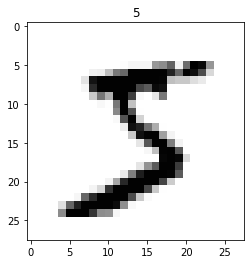

In [13]:
plt.imshow(train_data.data[0], cmap="Greys")
plt.title("%i" % train_data.targets[0])
plt.show()